Logistic-Regression

In [1]:
#Importing necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Read the dataset
df= pd.read_csv('Client.csv',index_col=0)
df

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,1,0.0,1.0,0.0,50.0,34.940
1,3,0,1.0,0.0,0.0,18.0,0.891
2,66,0,0.0,1.0,0.0,5.0,0.330
3,70,1,0.0,1.0,1.0,31.0,0.037
4,96,0,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,0,0.0,1.0,0.0,NaN,0.576
1336,34110,1,1.0,1.0,0.0,46.0,3.705
1337,34113,0,1.0,1.0,0.0,39.0,0.099
1338,34145,1,1.0,0.0,0.0,8.0,3.177


EDA

In [3]:
df.describe()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,11202.001493,0.511194,0.558735,0.907621,0.017028,28.414422,3.806307
std,9512.750796,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4177.000000,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,8756.500000,1.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,15702.500000,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,34153.000000,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [4]:
df.drop(columns=['CASENUM'], inplace=True)

In [5]:
df.isna().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

<Axes: >

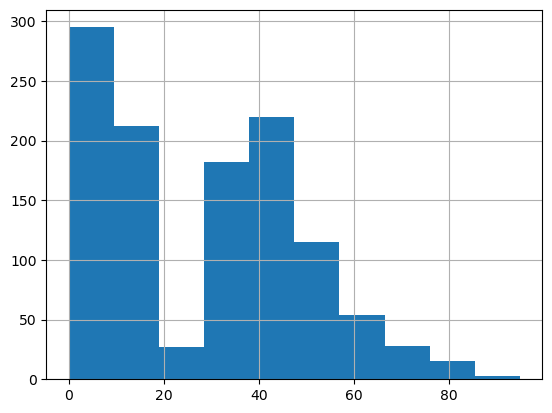

In [6]:
df['CLMAGE'].hist()

In [7]:
#Missing Value imputation
from sklearn.impute import SimpleImputer

In [8]:
si= SimpleImputer(strategy='most_frequent')

In [9]:
df.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,1,0.0,1.0,0.0,50.0,34.940
1,0,1.0,0.0,0.0,18.0,0.891
2,0,0.0,1.0,0.0,5.0,0.330
3,1,0.0,1.0,1.0,31.0,0.037
4,0,0.0,1.0,0.0,30.0,0.038


In [10]:
df.iloc[:,1:4]= si.fit_transform(df.iloc[:,1:4])

In [11]:
df.isna().sum()

ATTORNEY      0
CLMSEX        0
CLMINSUR      0
SEATBELT      0
CLMAGE      189
LOSS          0
dtype: int64

In [12]:
df['CLMAGE'].fillna(df['CLMAGE'].mean(), inplace=True)

In [13]:
#Splitting the data into training and testing set

In [14]:
df.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,1,0.0,1.0,0.0,50.0,34.940
1,0,1.0,0.0,0.0,18.0,0.891
2,0,0.0,1.0,0.0,5.0,0.330
3,1,0.0,1.0,1.0,31.0,0.037
4,0,0.0,1.0,0.0,30.0,0.038


In [15]:
df.shape

(1340, 6)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x = df.iloc[:,1:]

In [18]:
y = df['ATTORNEY']

In [19]:
xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size=0.75, random_state=1)

In [20]:
xtrain

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
1323,1.0,1.0,0.0,9.000000,5.460
676,0.0,1.0,0.0,28.414422,3.906
1129,0.0,1.0,0.0,10.000000,0.100
97,0.0,1.0,0.0,1.000000,34.571
662,1.0,1.0,0.0,0.000000,0.005
...,...,...,...,...,...
715,0.0,1.0,0.0,13.000000,6.979
905,0.0,1.0,0.0,28.414422,3.330
1096,0.0,1.0,0.0,50.000000,3.095
235,1.0,1.0,0.0,17.000000,1.619


Model Building

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lg = LogisticRegression()

In [23]:
#Train the model
lg.fit(xtrain,ytrain)

#Prediction
ypred = lg.predict(xtest)

In [24]:
ypred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [25]:
len(xtest)

1005

In [26]:
len(ypred)

1005

Model Evaluation

In [27]:
#Actual Values vs Predicted Values
print(ytest[:25].values)
print(ypred[:25])

[0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0]
[0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0]


In [28]:
lg.predict_proba(xtest)

array([[0.74973947, 0.25026053],
       [0.74399634, 0.25600366],
       [0.55235138, 0.44764862],
       ...,
       [0.5741501 , 0.4258499 ],
       [0.01396428, 0.98603572],
       [0.62403262, 0.37596738]])

In [29]:
#Classification Report
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.65      0.79      0.71       492
           1       0.74      0.59      0.66       513

    accuracy                           0.69      1005
   macro avg       0.70      0.69      0.69      1005
weighted avg       0.70      0.69      0.68      1005



In [31]:
confusion_matrix(ytest, ypred)

array([[387, 105],
       [209, 304]], dtype=int64)

Text(50.722222222222214, 0.5, 'Predicted Values')

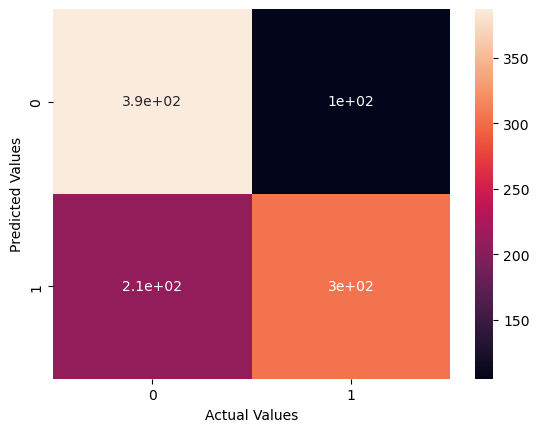

In [32]:
sns.heatmap(confusion_matrix(ytest,ypred), annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [33]:
proba= lg.predict_proba(xtest)[:,1]
proba

array([0.25026053, 0.25600366, 0.44764862, ..., 0.4258499 , 0.98603572,
       0.37596738])

In [34]:
#Threshold Selection

In [35]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

In [36]:
roc_curve(ytest,proba)

(array([0.        , 0.        , 0.        , 0.00203252, 0.00203252,
        0.00406504, 0.00406504, 0.00813008, 0.00813008, 0.0101626 ,
        0.0101626 , 0.01219512, 0.01219512, 0.01626016, 0.01626016,
        0.01829268, 0.01829268, 0.01829268, 0.0203252 , 0.0203252 ,
        0.02235772, 0.02235772, 0.02439024, 0.02439024, 0.02642276,
        0.02642276, 0.02845528, 0.02845528, 0.0304878 , 0.0304878 ,
        0.03252033, 0.03252033, 0.03455285, 0.03455285, 0.03861789,
        0.03861789, 0.04268293, 0.04268293, 0.04471545, 0.04471545,
        0.04674797, 0.04674797, 0.04878049, 0.04878049, 0.05081301,
        0.05081301, 0.05487805, 0.05487805, 0.05894309, 0.05894309,
        0.06097561, 0.06097561, 0.06300813, 0.06300813, 0.06504065,
        0.06504065, 0.06504065, 0.06707317, 0.06707317, 0.06910569,
        0.06910569, 0.07113821, 0.07113821, 0.07520325, 0.07520325,
        0.07723577, 0.07723577, 0.07926829, 0.07926829, 0.08130081,
        0.08130081, 0.08536585, 0.08536585, 0.08

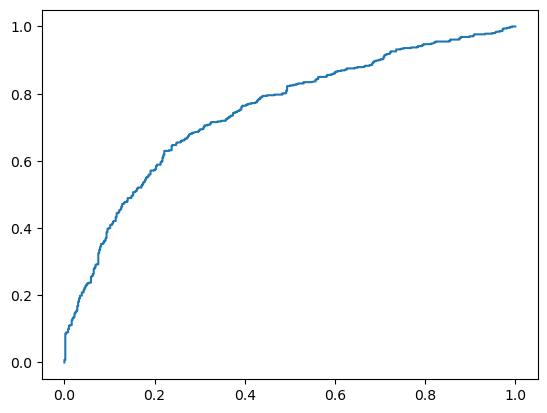

In [37]:
fpr,tpr,threshold = roc_curve(ytest,proba)
plt.plot(fpr,tpr)

In [38]:
auc=roc_auc_score(ytest,proba)
auc

0.7477238149574478

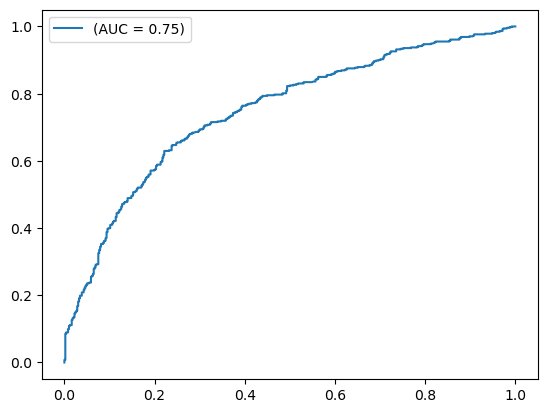

In [39]:
fpr,tpr,threshold = roc_curve(ytest,proba)
plt.plot(fpr,tpr,label='(AUC = %0.2f)'%auc)
plt.legend()

In [40]:
auc

0.7477238149574478

In [41]:
proba

array([0.25026053, 0.25600366, 0.44764862, ..., 0.4258499 , 0.98603572,
       0.37596738])

In [42]:
len(threshold)

429

In [43]:
accuracy = []

for i in threshold:
    ypred = np.where(proba>i,1,0)
    accuracy.append(accuracy_score(ytest,ypred))

final_threshold = pd.concat([pd.Series(threshold),pd.Series(accuracy)], axis=1)
final_threshold.columns = ['Threshold','Accuracy']

In [44]:
final_threshold.sort_values(by='Accuracy', ascending=False)

,Threshold,Accuracy
170,0.451523,0.702488
171,0.447893,0.701493
165,0.468274,0.701493
174,0.441658,0.701493
169,0.452336,0.701493
...,...,...
428,0.163380,0.511443
3,1.000000,0.493532
2,1.000000,0.492537
1,1.000000,0.489552


In [45]:
accuracy=[]
for i in threshold:
    ypred=np.where(proba> i, 1,0)
    accuracy.append(accuracy_score(ytest,ypred))

In [46]:
accuracy

[0.48955223880597015,
 0.48955223880597015,
 0.4925373134328358,
 0.4935323383084577,
 0.5313432835820896,
 0.5323383084577115,
 0.5323383084577115,
 0.5323383084577115,
 0.5353233830845772,
 0.536318407960199,
 0.5393034825870647,
 0.5402985074626866,
 0.5393034825870647,
 0.5393034825870647,
 0.545273631840796,
 0.5462686567164179,
 0.545273631840796,
 0.5462686567164179,
 0.5482587064676617,
 0.5472636815920398,
 0.5482587064676617,
 0.5522388059701493,
 0.5532338308457712,
 0.5532338308457712,
 0.554228855721393,
 0.554228855721393,
 0.5552238805970149,
 0.5601990049751244,
 0.5611940298507463,
 0.5661691542288557,
 0.5671641791044776,
 0.5701492537313433,
 0.5711442786069652,
 0.573134328358209,
 0.573134328358209,
 0.5761194029850746,
 0.5761194029850746,
 0.5781094527363184,
 0.5791044776119403,
 0.5800995024875621,
 0.5810945273631841,
 0.582089552238806,
 0.5830845771144278,
 0.5830845771144278,
 0.5840796019900497,
 0.5840796019900497,
 0.5840796019900497,
 0.5830845771144278

In [47]:
final_threshold

,Threshold,Accuracy
0,2.000000,0.489552
1,1.000000,0.489552
2,1.000000,0.492537
3,1.000000,0.493532
4,0.957509,0.531343
...,...,...
424,0.188972,0.515423
425,0.188761,0.514428
426,0.180111,0.514428
427,0.179349,0.513433


In [49]:
final_threshold.sort_values(by='Accuracy', ascending= False)

,Threshold,Accuracy
170,0.451523,0.702488
171,0.447893,0.701493
165,0.468274,0.701493
174,0.441658,0.701493
169,0.452336,0.701493
...,...,...
428,0.163380,0.511443
3,1.000000,0.493532
2,1.000000,0.492537
1,1.000000,0.489552


In [50]:
from sklearn.preprocessing import binarize

In [51]:
y= binarize([proba],threshold=0.442068)[0]
y

array([0., 0., 1., ..., 0., 1., 0.])

In [52]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00       492
           1       0.51      1.00      0.68       513

    accuracy                           0.51      1005
   macro avg       0.76      0.50      0.34      1005
weighted avg       0.75      0.51      0.35      1005

